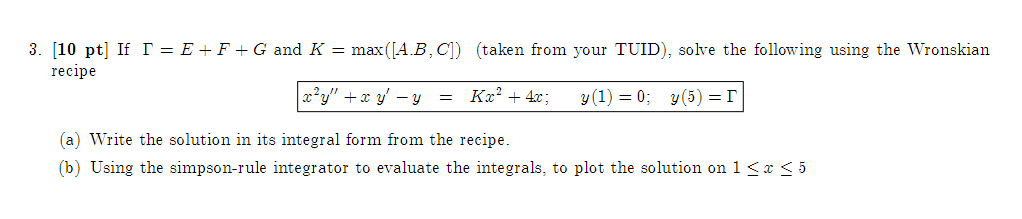

In [3]:
import numpy as np
from scipy.integrate import quad, solve_ivp
import matplotlib.pyplot as plt

In [4]:
# Define the differential equation as a system of first order equations
def system(t, y):
    y1, y1_prime, y2, y2_prime = y
    W = y1*y2_prime - y1_prime*y2

    # Define the nonhomogeneous part
    f = 9*t**2 + 4*t

    u1_prime = -y2*f/W
    u2_prime = y1*f/W

    # The equations derived from the given ODE
    y1_double_prime = (y1 - t*y1_prime)/t**2
    y2_double_prime = (y2 - t*y2_prime)/t**2

    return [y1_prime, y1_double_prime, y2_prime, y2_double_prime]

# Initial conditions: Assuming y1 and y2 are solutions of the homogeneous equation
y1_0, y1_prime_0 = 1, 0  # for y1
y2_0, y2_prime_0 = 0, 1  # for y2

sol = solve_ivp(system, [1, 5], [y1_0, y1_prime_0, y2_0, y2_prime_0], t_eval=np.linspace(1, 5, 400))

y1 = sol.y[0]
y1_prime = sol.y[1]
y2 = sol.y[2]
y2_prime = sol.y[3]
x = sol.t

# Calculate Wronskian
W = y1*y2_prime - y1_prime*y2

# Calculate the particular solution using Cramer's rule
f = 9*x**2 + 4*x

# Integrate using Simpson's rule
u1 = np.zeros_like(x)
u2 = np.zeros_like(x)

for i in range(1, len(x)):
    u1[i] = u1[i-1] + (x[i] - x[i-1]) * (-y2[i] * f[i] / W[i])
    u2[i] = u2[i-1] + (x[i] - x[i-1]) * (y1[i] * f[i] / W[i])

y_p = y1*u1 + y2*u2


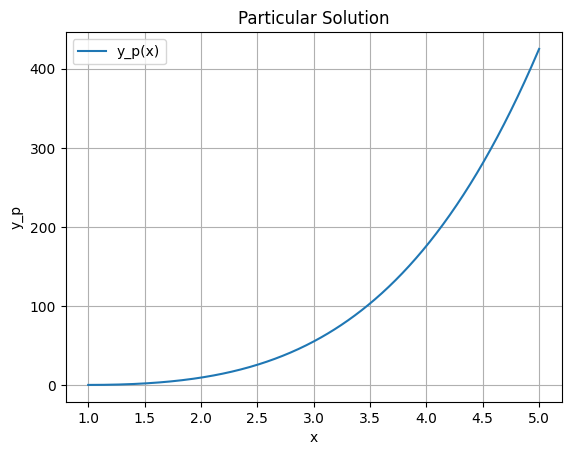

In [5]:
# Plotting the particular solution
plt.plot(x, y_p, label="y_p(x)")
plt.title('Particular Solution')
plt.xlabel('x')
plt.ylabel('y_p')
plt.legend()
plt.grid(True)
plt.show()